                                            
Basic Environment Set-up and Classification and Exploratory data analysis on IRIS Dataset

**Importing all the required library**

In [27]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

**Loading the iris dataset**

In [28]:
iris = load_iris()
X = iris.data
y = iris.target

**Q1.plot the pairs plot of the data**

**Converting array list data type to panda data frame**

we load the data as a panda dataframe inorder to have a clear structural idea about the rows and columns and different targets and features of the data frame.Each row of the table represents an observation about one of the three categories of species which can either be a setosa or a versicolor or a virginica.Each column represents a variable categorizing the species based on its features namely petal width,petal length,sepal length,sepal width.There is one categorical data in my dataframe that mentions the species name

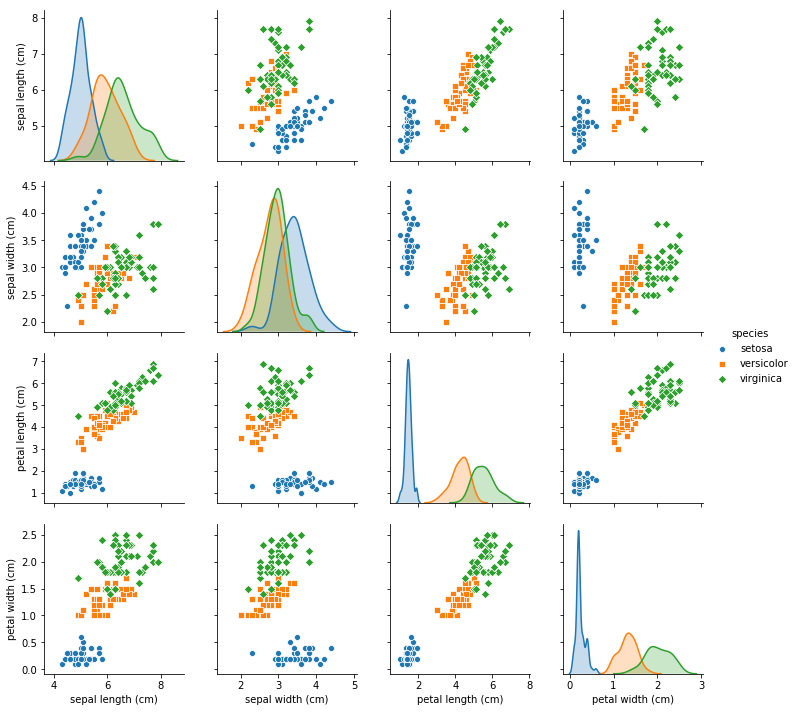

In [29]:
#converting the array type data to panda table data structure
data1 = pd.DataFrame(iris.data,columns= iris.feature_names)
data1['species']= iris.target
data1['species'].replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)
#pair plotting based on the dimensions
g=sns.pairplot(data1,hue="species", markers=["o", "s", "D"])
plt.show()

**Interpretation of the separability of the three classes in terms of features**

The output of the question 1 has two figures : Histogram and scatter plot

The histogram along the diagonal helps us to see the univariate ditribution while the scatter plots on the either side of the triangle shows the relationship or patterns or anomalies between two variables.

When analyzing the observed histogram,we find that the petal features better classifies the three classes as we are able to completely classify the setosa species and there is a very less coorelation or overlapping of data between versicolor and virginica.When considering the sepal features classification feels almost impossible as there is lots of overlapping of data feature and the mean value of the distribution also is nearly the same.

when analyzing the obsereved scatterplot,we find petal length vs petal width and petal width vs petal length better classifies the species as they can be categorized based on both the features considered and there is very less boundary overlapping between versicolor and virginica.Hence the petal features are considered the best to classify the iris data set

**Q2.Classify the data using KNN classifier**

k : 1
accuracy : 0.9
k : 5
accuracy : 0.9333333333333333
k : 10
accuracy : 0.9333333333333333
k : 15
accuracy : 0.9333333333333333
k : 20
accuracy : 0.9333333333333333
k : 25
accuracy : 0.9666666666666667
k : 30
accuracy : 0.9666666666666667
k : 35
accuracy : 0.9333333333333333

The accuracy list is  [0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


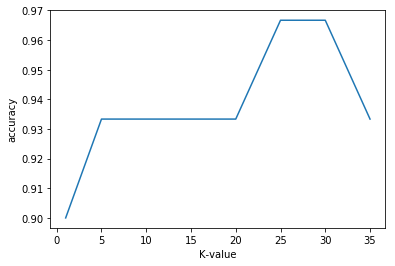

best k value :  25
accuracy of model on test set :  100.0


In [36]:
k=[1,5,10,15,20,25,30,35]
max_k=0
max_accuracy=0
accuracy_list=[]
#splitting the data into three sets:train,validation,test in the percentage of 60,20,20 respectively
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)
#the KNN classifier runs for every value of k considered {1,5,10,15,20,25,30,35}
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    current_accuracy=accuracy_score(y_val,knn.predict(X_val))
    print("k :",i)
    print("accuracy :",current_accuracy)
    accuracy_list.append(current_accuracy)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        max_k=i
print()
print("The accuracy list is ",accuracy_list)
plt.plot(k,accuracy_list)
plt.xlabel('K-value')
plt.ylabel('accuracy')
plt.show()
print("best k value : ",max_k)
knn1=KNeighborsClassifier(n_neighbors=max_k)
knn1.fit(X_train,y_train)
best_fit=accuracy_score(y_test,knn1.predict(X_test))*100
print("accuracy of model on test set : ",best_fit)


**Choosing the best k value**

Ideally the k value for a set of data samples(n) is considered to be squareroot(n) but in our case the k value that gives the maximum accuracy in two values of k (k=25 and k=30) and incases of ties between the k value we consider the following rules:
<br>
<br>
1)k should not be even<br>
2)K value must not be multiples of the number of classes<br>
3)Should not be too small or too large<br><br>
So,Considering the above condition we choose the value of k to be 25.

**Q3. Classify data using a linear SVM classifier**

The accuracy list is : [0.9575757575757576, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9423076923076923, 0.933974358974359]


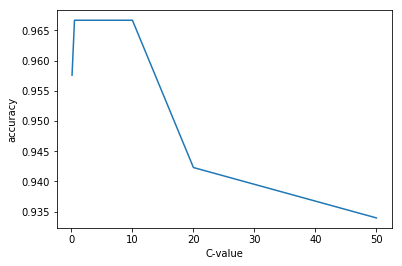

best c value :  2
mean accuracy value 0.9666666666666668
The accuracy for the optimal c in test data set =2 is 100.0


In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
accuracy_val=[]
max_accuracy=0
max_c=0
c_val=[0.1,0.5,1,2,5,10,20,50]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
for i in c_val:
    clf=SVC(kernel='linear',C=i,random_state=42).fit(X_train,y_train)
   # kf=KFold(n_splits =10)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    score_mean=scores.mean()
    if(score_mean>max_accuracy):
        max_accuracy=score_mean
        max_c=i
    accuracy_val.append(scores.mean())
print("The accuracy list is :",accuracy_val)
plt.plot(c_val,accuracy_val)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()
print("best c value : ",max_c)
print("mean accuracy value",max_accuracy)
clf_optimal=SVC(kernel='linear',C=max_c,random_state=42).fit(X_train,y_train)
pred_x=clf_optimal.predict(X_test)
acc=accuracy_score(y_test,pred_x)*100
print("The accuracy for the optimal c in test data set ={0} is {1}".format(max_c,acc))

**Best c value**<br>
The c values we have chosen are : 0.1,0.5,1,2,5,10,20,50 and the maximum accuracy is obtained for the following c values {2,5,10} with the same accuracy value of 0.9666666666666668.Here we need to choose the optimal c.The larger the c value,larger is the time taken to train the model and hence we choose the optimal c value to be 2 as it is the smallest value among the ones providing same accuracy

**Q4.Decision tree based classifier for different values of depth {3,5,10,None}**

[0.9332167832167831, 0.908216783216783, 0.9248834498834497, 0.9248834498834497]


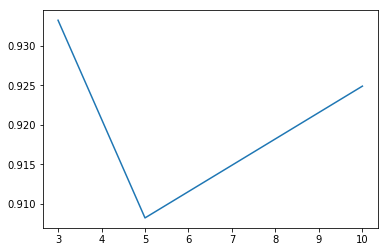

the best accuracy value :  0.9332167832167831
the corresponding depth value :  3
The accuracy for the optimal depth 3 for test data set is 100.0


In [38]:
from sklearn import tree
depth_val=[3,5,10,None]
max_acc=0;
max_depth1=0;
accuracy_val1=[]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
for i in depth_val:
    c=tree.DecisionTreeClassifier(random_state=42,max_depth=i)
    #kf = KFold(n_splits=10)
    scores1=cross_val_score(c,X_train,y_train,cv=10,scoring='accuracy')
    score_mean1=scores1.mean()
    accuracy_val1.append(score_mean1)
    if(score_mean1>max_acc):
        max_acc=score_mean1
        max_depth1=i
print(accuracy_val1)
plt.plot(depth_val,accuracy_val1)
plt.show()
print("the best accuracy value : ",max_acc)
print("the corresponding depth value : ",max_depth1)
c_best=tree.DecisionTreeClassifier(random_state=42,max_depth=max_depth1).fit(X_train,y_train)
acc1=accuracy_score(y_test,c_best.predict(X_test))*100
print("The accuracy for the optimal depth {0} for test data set is {1}".format(max_depth1,acc1))

**The best value for the depth of decision tree**<br>
From the graph plotted,we are able to observe that the maximum accuracy of 0.9416666666666667 is obtained for the depth value=3.Hence max depth = 3 is chosen as the best value.

**Q4. Gradient Boosting Classifier for different estimator values {5, 10, 50, 150, 200}**

The accuracy list is:  [0.9325757575757574, 0.9325757575757574, 0.9248834498834497, 0.9165501165501164, 0.9165501165501164]


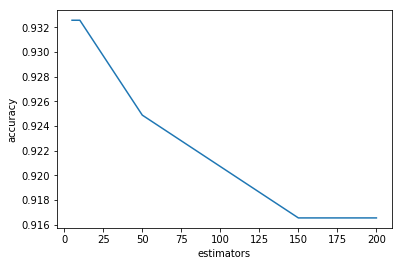

the best accuracy value :  0.9325757575757574
the corresponding estimator value :  5
The accuracy for the optimal estimator for test data set=5 is 100.0


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
accuracy_list=[]
max_estimator=0;
max_est_acc=0;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
estimators = [5, 10, 50, 150, 200]
for i in estimators:
    clf = GradientBoostingClassifier(n_estimators=i,random_state=42)
   # k = KFold(n_splits=10)
    cross_val = cross_val_score(clf , X_train, y_train,cv = 10 , scoring = 'accuracy')
    cross_val_mean=cross_val.mean()
    accuracy_list.append(cross_val_mean)
    if(cross_val_mean>max_est_acc):
        max_est_acc=cross_val_mean
        max_estimator=i
print("The accuracy list is: ",accuracy_list)
plt.plot(estimators,accuracy_list)
plt.xlabel('estimators')
plt.ylabel('accuracy')
plt.show()
print("the best accuracy value : ",max_est_acc)
print("the corresponding estimator value : ",max_estimator)
gbc1d= GradientBoostingClassifier(n_estimators=max_estimator,random_state=42).fit(X_train,y_train)
acc2=accuracy_score(y_test,gbc1d.predict(X_test))*100
print("The accuracy for the optimal estimator for test data set={0} is {1}".format(max_estimator,acc2))

**The best value for n_estimator**<br>
Gradient boosting classifier generally combines weak learning odels together to form a strong predictive model.The decision trees are considered to be the weak learners here and are used by the gradient boosting classifier.The n_estimators parameter we have considered is :5, 10, 50, 150, 200 is number of boosting stages to perform.Usually the higher the number of trees or boosting stages the better is the trained model. However, adding a lot of trees can slow down the training process considerably.So once we reach the threshold that gives the best accuracy we consider that as the optimal value for n_estimator as 5.

**Q5.Random Forest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
no_of_trees=[5, 10, 50, 150, 200] 
max_depth_of_tree=[3, 5, 10, None]
max_accuracy=0 
optimal_number_of_tree=0
optimal_depth=0
matrix_list= []
for i in no_of_trees:
    accuracy_list=[]   
    for n in max_depth_of_tree:
        Random_Forest=RandomForestClassifier(n_estimators=i ,max_depth=n, random_state = 42)
        cross_val = cross_val_score(Random_Forest , X_train, y_train,cv = 10 , scoring = 'accuracy')
        accuracy_list.append(cross_val.mean())
        if(cross_val.mean()>max_accuracy):
            max_accuracy = cross_val.mean()
            optimal_number_of_tree = i
            optimal_depth = n
    matrix_list.append(accuracy_list)
Random_Forest1=RandomForestClassifier(n_estimators=i ,max_depth=n, random_state = 42)
Random_Forest1.fit(X_train,y_train)
accuracy_score_val=accuracy_score(y_test,Random_Forest1.predict(X_test))*100
print("The accuracy list is: ",matrix_list)
print("\nThe maximum accuracy for the optimal number of trees:",optimal_number_of_tree,"and optimal max depth:",optimal_depth,"is",accuracy_score_val)

The accuracy list is:  [[0.9248834498834497, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497], [0.9332167832167831, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497], [0.9415501165501163, 0.9415501165501163, 0.9332167832167831, 0.9332167832167831], [0.9415501165501163, 0.9332167832167831, 0.9248834498834497, 0.9248834498834497], [0.9415501165501163, 0.9332167832167831, 0.9332167832167831, 0.9332167832167831]]

The maximum accuracy for the optimal number of trees: 50 and optimal max depth: 3 is 100.0


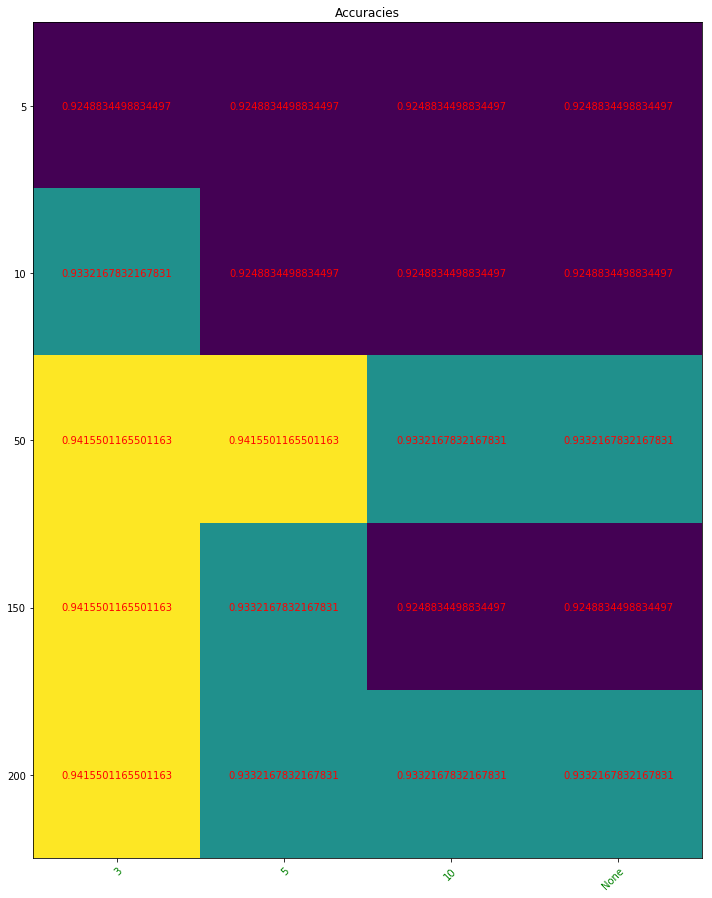

In [42]:
#heat map
fig, plot = plt.subplots(figsize=(10,15))
im_obj = plot.imshow(matrix_list)
plot.set_xticks(np.arange(len(max_depth_of_tree)))
plot.set_yticks(np.arange(len(no_of_trees)))
plot.set_xticklabels(max_depth_of_tree)
plot.set_yticklabels(no_of_trees)
plt.setp(plot.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for i in range(len(no_of_trees)):
    for j in range(len(max_depth_of_tree)):
        text = plot.text(j, i, matrix_list[i] [j],ha="center", va="center", color="r")
plot.set_title("Accuracies")
fig.tight_layout()
plt.show()


**Optimal depth and no of trees for random forest**<br>Random forest is constructed by combining multiple decision tree under a single root.Here in the random forest we use both the depth of tree and the number of trees as a hyperparameter to determine which value gives the best accuracy.So,while observing the heat map we are able to see that after a certain increase in the value of number of trees and depth of the tree the accuracy improvement either becomes neglible or it decreses.So, for the maximum depth the optimal value is 3 and in the number of trees the optimal value is 50.We always consider the lower value of depth and number of trees in the cases where the accuracy is same inorder to resuce the computational cost and to avoid overfitting.

**Q5. Analysis**

**1.** The training data set is  the one used to fit the data and the testing data set is the one that is used to provide a unbiased evaluation of the trained model inorder to see how it will perform when future competing data comes into play.So,if we use the entire data sample on training the model alone we wont be able to evaluate the model and check whether our final trained model works fine or not.It is always the best practice to split the data samples into training data set and testing data set

**2.** For KNN Classifier we split the data into training dataset,validation set and test data set.The validation data set is the sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.So,use validation dataset inorder to make sure that the k value we have choose is the best fit(not an overfit or an underfit).Once we determine the best fit of hyperparameters for the KNN Classifiers we then test the model on the test set to predict our model accuracy.

**3.** Inorder to find the best k value we run the KNN classifier several times with different values of K and choose the value of k that gives the maximum accuracy and reduces the number of errors encountered.Here the different k values we are considering are : 1,5,10,15,20,25,30,35.From the graph that is obtained we can say that initially when the KNN Classifier was trained with small values of k,the predictions was not stable and we obtained less accuracy values.As K value increased the accuracy improved and we reached a point at which the prediction was much stabler than the other k values (k=25,30).Later,even though the k value increased,the number of errors we encountered increased which means that we have increased the k value beyond the best fit.So,from this we can infer that the k value should neither be too small or too large.In order to break the tie in the optimal value of k to be chosen from the two values obtained(25,30) we go for the rule stating that k should not be a even number and should be a multiple of the number of samples 




**4.** In decision tree the optimal result is obtained at the depth value of 3 and as the depth of the tree increases the accuracy increases/decreases randomnly but is never higher than the accuracy obtained for optimal depth value 3 because of overfitting.Whereas, when we observe the heat map obtained from random forest : As the depth of the tree increases,the accuracy decreases gradually and comes to the lowest.The reason for this variation in accuracy obtained by these classifier is that decision tree takes the training set as whole and computes the accuracy of the model,where as in random forest the accuracy of the model is the mean of the multile decision trees constructed by randomnly picking up data from the dataset.

**5.** Gradient boosting classifier generally combines weak learning odels together to form a strong predictive model.The decision trees are considered to be the weak learners here and are used by the gradient boosting classifier.Usually the higher the number of trees or boosting stages the better is the trained model. However, adding a lot of trees can slow down the training process considerably.So once we reach the threshold that gives the best accuracy we consider that as the optimal value.

**Comparing relative performance of gradient tree boosting with random forest**<br>
The relative performance of the gradient boosting with the random forest is that in gradient boosting classifier as the number of estimator increases the accuracy of the model increases,it reaches the optimal value of n_estimator and later the accuracy decreases gradually as we have pushed the n_estimator beyond the limit whereas in random forest after the threshold is reached there is a randomness in the accuracy of the model because of the way the gradient boosting tree and decision tree is constructed.The random forests combines the result of the accuracy of multiple decision trees at the end of the process by averaging or majority voting rules while gradient boosting combines results along the way enabling the weak learning decision tree to improve along the way.


**6.** In linear svc the c is called as the regularization parameter that helps the model to reduce the misclassification rate by controlling the tradeoff between smooth decision boundary and classifying the training points correctly.In LinearSVC we try to achieve two things :larger margin and lower misclassification rate.Achieving both of them in parallel is tough and we use the regularization parameter to do the same.The C values considered : {0.1,0.5,1,2,5,10,20,50} spans over a larger range and hence better is our study.So,Initially when the value of c is small(c=0.1) there was a smaller margin,more misclassification hence the lesser accuracy.As the value of c(c=2,5,10) increased the hyperplane margin also increased thereby leading to better classification of the data and a more stable model.Further when the c value was increased(c=20,50),the prediction results stop improving as it reached the maximum threshold and lead to less accuracy.The larger the c value,larger is the time taken to train the model and hence we choose the optimal c value to be 2 as it is the smallest value among the ones providing same accuracy